<a href="https://colab.research.google.com/github/mohit579-pixel/SL-3/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

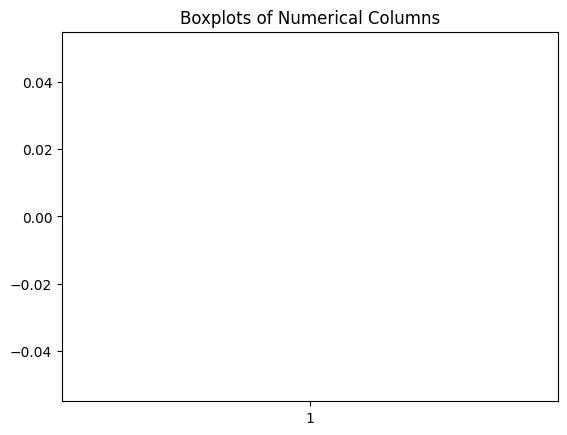

0           70.0
1          104.0
2          100.0
3          100.0
4           77.0
           ...  
2248885     34.0
2248886     74.0
2248887      6.0
2248888    910.0
2248889      NaN
Name: receipt_value, Length: 2248890, dtype: float64

In [72]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/content/deputies_dataset.csv")


numerical_columns = df.select_dtypes(include='number')


plt.boxplot(numerical_columns['receipt_value'])
# plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Columns")
plt.show()
numerical_columns['receipt_value']


In [73]:
main_col=df['receipt_value']
clean=main_col.dropna()
Q1 = clean.quantile(0.25)
Q3 = clean.quantile(0.75)

IQR = Q3 - Q1
IQR,Q1,Q3

(429.0, 50.0, 479.0)

In [74]:
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR
print("Lower Bound:",LB)
print("Upper Bound:",UB)
clean

Lower Bound: -593.5
Upper Bound: 1122.5


0           70.0
1          104.0
2          100.0
3          100.0
4           77.0
           ...  
2248884     90.0
2248885     34.0
2248886     74.0
2248887      6.0
2248888    910.0
Name: receipt_value, Length: 2248889, dtype: float64

In [80]:
mask = clean[(clean>UB) | (clean<LB)]
filtered_data=list(set(clean)-set(mask))
filtered_data=clean[mask]
len(filtered_data)
# plt.boxplot(filtered_data)

224403

In [77]:
import scipy.stats as stats
zscores=stats.zscore(clean)

zscores = (zscores > -3) & (zscores < 3)
filtered_zscore=list(set(clean)-set(zscores))
# filtered_zscore=clean[zscores]
len(filtered_zscore)
# plt.boxplot(filtered_zscore)

9487

[[0.5,
  0.52,
  0.53,
  0.55,
  0.56,
  0.6,
  0.61,
  0.62,
  0.65,
  0.67,
  0.5,
  0.52,
  0.53,
  0.55,
  0.56,
  0.6,
  0.61,
  0.62,
  0.65,
  0.67,
  0.5,
  0.52,
  0.53,
  0.55,
  0.56,
  0.6,
  0.61,
  0.62,
  0.65,
  0.67,
  0.5,
  0.52,
  0.53,
  0.55,
  0.56,
  0.6,
  0.61,
  0.62,
  0.65,
  0.67,
  0.5,
  0.52,
  0.53,
  0.55,
  0.56,
  0.6,
  0.61,
  0.62,
  0.65,
  0.67,
  0.5,
  0.52,
  0.53,
  0.55,
  0.56,
  0.6,
  0.61,
  0.62,
  0.65,
  0.67,
  0.5,
  0.52,
  0.53,
  0.55,
  0.56,
  0.6,
  0.61,
  0.62,
  0.65,
  0.67,
  0.5,
  0.52,
  0.53,
  0.55,
  0.56,
  0.6,
  0.61,
  0.62,
  0.65,
  0.67,
  0.5,
  0.52,
  0.53,
  0.55,
  0.56,
  0.6,
  0.61,
  0.62,
  0.65,
  0.67,
  0.5,
  0.52,
  0.53,
  0.55,
  0.56,
  0.6,
  0.61,
  0.62,
  0.65,
  0.67,
  0.5,
  0.52,
  0.53,
  0.55,
  0.56,
  0.6,
  0.61,
  0.62,
  0.65,
  0.67,
  0.5,
  0.52,
  0.53,
  0.55,
  0.56,
  0.6,
  0.61,
  0.62,
  0.65,
  0.67,
  0.5,
  0.52,
  0.53,
  0.55,
  0.56,
  0.6,
  0.61,
  0.62,
  

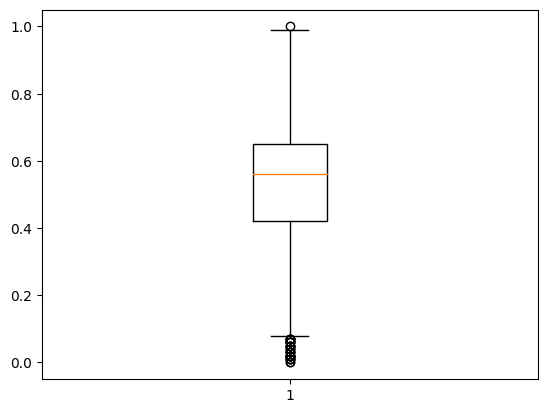

In [93]:
import numpy as np
grades = np.concatenate([[50,52,53,55,56,60,61,62,65,67]*20, np.random.randint(0, 101, size=300)])
grades
mini=grades.min()
maxi=grades.max()
normalized_val = [(x - mini) / (maxi - mini) for x in grades]
plt.boxplot(normalized_val)


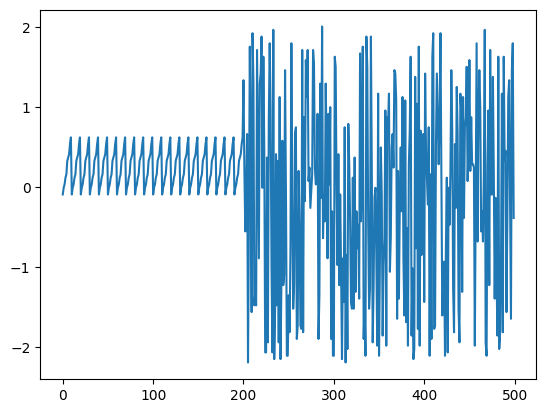

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
grades_2d = [[x] for x in grades]
scaled=scaler.fit_transform(grades_2d)
plt.plot(scaled)

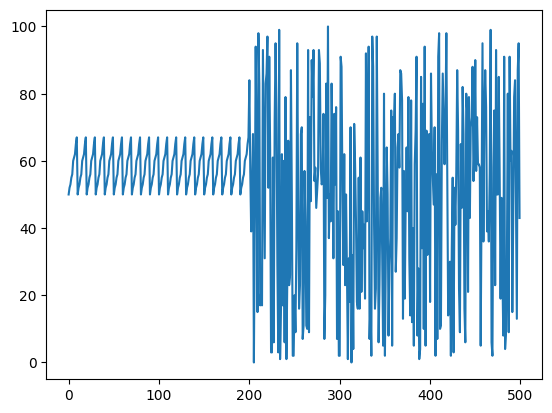

In [105]:
plt.plot(grades)